In [205]:
import kaggle
!kaggle competitions download -c playground-series-s3e22


  0%|          | 0.00/59.7k [00:00<?, ?B/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 186kB/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 181kB/s]


In [206]:
# from zipfile import ZipFile
# file_path = 'playground-series-s3e22.zip'
# with ZipFile(file_path, 'r') as zip:
#     zip.extractall()

In [290]:
import pandas as pd
import numpy as np

In [291]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [292]:
train_df = train_df[train_df['peristalsis'] != 'distend_small']
train_df = train_df[train_df['nasogastric_reflux'] != 'slight']
train_df = train_df[train_df['rectal_exam_feces'] != 'serosanguious']
train_df['outcome'].replace({'died': 0, 'euthanized': 1, 'lived': 2}, inplace=True)
train_df.shape

(1232, 29)

In [293]:
df1 = train_df.drop(columns=['id', 'hospital_number', 'outcome'], axis = 1)
df2 = test_df.drop(columns=['id', 'hospital_number'], axis = 1)

In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 0 to 1234
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1232 non-null   object 
 1   age                    1232 non-null   object 
 2   rectal_temp            1232 non-null   float64
 3   pulse                  1232 non-null   float64
 4   respiratory_rate       1232 non-null   float64
 5   temp_of_extremities    1193 non-null   object 
 6   peripheral_pulse       1172 non-null   object 
 7   mucous_membrane        1211 non-null   object 
 8   capillary_refill_time  1226 non-null   object 
 9   pain                   1188 non-null   object 
 10  peristalsis            1212 non-null   object 
 11  abdominal_distention   1209 non-null   object 
 12  nasogastric_tube       1152 non-null   object 
 13  nasogastric_reflux     1211 non-null   object 
 14  nasogastric_reflux_ph  1232 non-null   float64
 15  rectal_ex

In [295]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                824 non-null    object 
 1   age                    824 non-null    object 
 2   rectal_temp            824 non-null    float64
 3   pulse                  824 non-null    float64
 4   respiratory_rate       824 non-null    float64
 5   temp_of_extremities    789 non-null    object 
 6   peripheral_pulse       777 non-null    object 
 7   mucous_membrane        811 non-null    object 
 8   capillary_refill_time  818 non-null    object 
 9   pain                   795 non-null    object 
 10  peristalsis            805 non-null    object 
 11  abdominal_distention   802 non-null    object 
 12  nasogastric_tube       760 non-null    object 
 13  nasogastric_reflux     810 non-null    object 
 14  nasogastric_reflux_ph  824 non-null    float64
 15  rectal

In [296]:
categorical_features = []
numerical_features = []
for cols in df2:
    if df2[cols].dtype == 'object':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [297]:
df1.isna().sum()

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        189
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [298]:
df2.isna().sum()

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [299]:
for col in df1.columns:
    if col in categorical_features:
        mode_value = df1[col].mode()[0]  
        df1[col].fillna(mode_value, inplace=True)  
    else:
        median_value = df1[col].median()  
        df1[col].fillna(median_value, inplace=True) 

In [300]:
for col in df2.columns:
    if col in categorical_features:
        mode_value = df2[col].mode()[0]  
        df2[col].fillna(mode_value, inplace=True)  
    else:
        median_value = df2[col].median()  
        df2[col].fillna(median_value, inplace=True) 

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

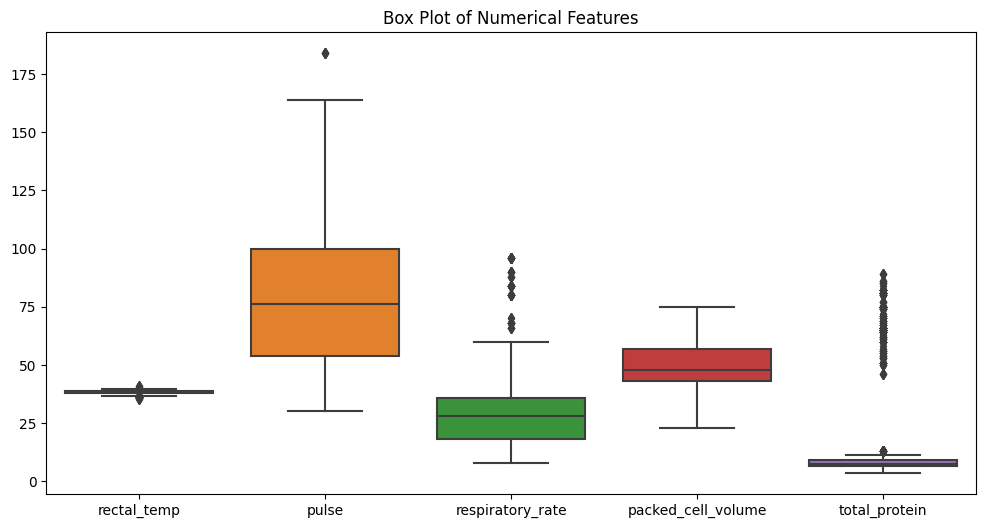

In [302]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']])
plt.title('Box Plot of Numerical Features')
plt.show()

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

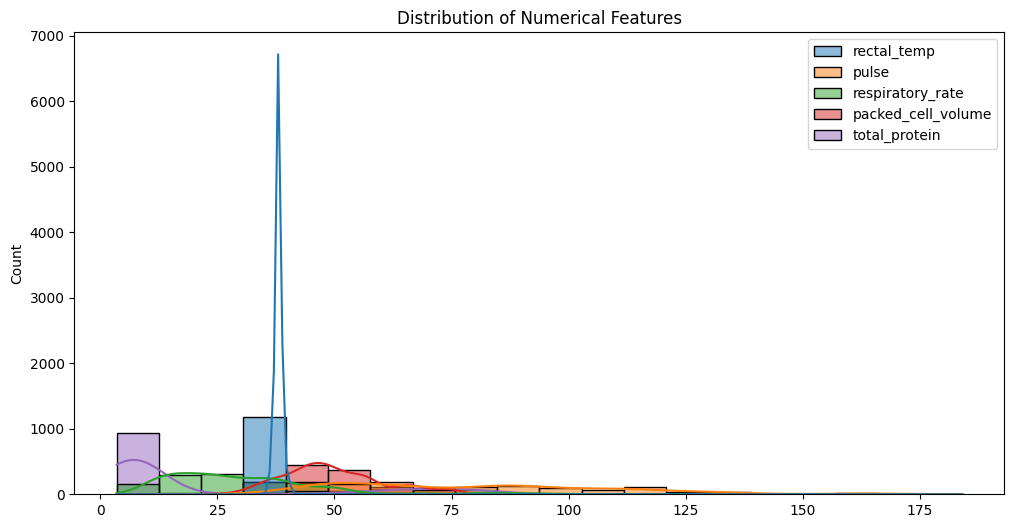

In [303]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df1[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']], bins=20, kde=True)
plt.title('Distribution of Numerical Features')
plt.show()

In [304]:
for cols in categorical_features:
    print(cols, df1[cols].unique())

surgery ['yes' 'no']
age ['adult' 'young']
temp_of_extremities ['cool' 'cold' 'normal' 'warm']
peripheral_pulse ['reduced' 'normal' 'absent' 'increased']
mucous_membrane ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red']
capillary_refill_time ['more_3_sec' 'less_3_sec' '3']
pain ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'slight']
peristalsis ['absent' 'hypomotile' 'normal' 'hypermotile']
abdominal_distention ['slight' 'moderate' 'none' 'severe']
nasogastric_tube ['slight' 'none' 'significant']
nasogastric_reflux ['less_1_liter' 'more_1_liter' 'none']
rectal_exam_feces ['decreased' 'absent' 'normal' 'increased']
abdomen ['distend_small' 'distend_large' 'normal' 'firm' 'other']
abdomo_appearance ['serosanguious' 'cloudy' 'clear']
surgical_lesion ['yes' 'no']
cp_data ['no' 'yes']


In [305]:
for cols in categorical_features:
    print(cols, df2[cols].unique())

surgery ['no' 'yes']
age ['adult' 'young']
temp_of_extremities ['normal' 'cool' 'cold' 'warm']
peripheral_pulse ['normal' 'reduced' 'absent' 'increased']
mucous_membrane ['normal_pink' 'bright_pink' 'bright_red' 'pale_cyanotic' 'dark_cyanotic'
 'pale_pink']
capillary_refill_time ['less_3_sec' 'more_3_sec' '3']
pain ['mild_pain' 'depressed' 'severe_pain' 'extreme_pain' 'moderate' 'alert']
peristalsis ['hypomotile' 'absent' 'hypermotile' 'normal']
abdominal_distention ['slight' 'moderate' 'severe' 'none']
nasogastric_tube ['none' 'slight' 'significant']
nasogastric_reflux ['none' 'more_1_liter' 'less_1_liter']
rectal_exam_feces ['normal' 'decreased' 'absent' 'increased']
abdomen ['distend_small' 'distend_large' 'other' 'firm' 'normal']
abdomo_appearance ['clear' 'serosanguious' 'cloudy']
surgical_lesion ['no' 'yes']
cp_data ['no' 'yes']


In [306]:
category_mapping = {
    'surgery': {'yes': 0, 'no': 1},
    'age': {'adult': 0, 'young': 1},
    'temp_of_extremities': {'cool': 0, 'cold': 1, 'normal': 2, 'warm': 3},
    'peripheral_pulse': {'reduced': 0, 'normal': 1, 'absent': 2, 'increased': 3},
    'mucous_membrane': {
        'dark_cyanotic': 0, 'pale_cyanotic': 1, 'pale_pink': 2,
        'normal_pink': 3, 'bright_pink': 4, 'bright_red': 5
    },
    'capillary_refill_time': {'more_3_sec': 0, 'less_3_sec': 1, '3': 2},
    'pain': {'depressed': 0, 'mild_pain': 1, 'extreme_pain': 2, 'alert': 3, 'severe_pain': 4, 'slight': 5, 'moderate': 5},
    'peristalsis': {'absent': 0, 'hypomotile': 1, 'normal': 2, 'hypermotile': 3, 'distend_small': 4},
    'abdominal_distention': {'slight': 0, 'moderate': 1, 'none': 2, 'severe': 3},
    'nasogastric_tube': {'slight': 0, 'none': 1, 'significant': 2},
    'nasogastric_reflux': {'less_1_liter': 0, 'more_1_liter': 1, 'none': 2, 'slight': 3},
    'rectal_exam_feces': {'decreased': 0, 'absent': 1, 'normal': 2, 'increased': 3, 'serosanguious': 4},
    'abdomen': {'distend_small': 0, 'distend_large': 1, 'normal': 2, 'firm': 3, 'other': 4},
    'abdomo_appearance': {'serosanguious': 0, 'cloudy': 1, 'clear': 2},
    'surgical_lesion': {'yes': 0, 'no': 1},
    'cp_data': {'no': 0, 'yes': 1}
}


df1.replace(category_mapping, inplace=True)
df2.replace(category_mapping, inplace=True)

In [307]:
train_X = df1
test_X = df2

In [308]:
train_X.shape

(1232, 26)

In [309]:
test_X.shape

(824, 26)

In [310]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('StandardScaling', StandardScaler(), numerical_features)
], remainder='passthrough')
train_X = ct.fit_transform(train_X)
test_X = ct.transform(test_X)

In [311]:
y = train_df['outcome']
y.shape

(1232,)

In [312]:
train_X.shape

(1232, 26)

In [313]:
test_X.shape

(824, 26)

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting (XGBoost)': XGBClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting (LightGBM)': LGBMClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting (CatBoost)': CatBoostClassifier(iterations=100, random_state=42, verbose=0),
    'Support Vector Machine (SVM)': SVC(kernel='rbf', C=1.0, random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
    'Ensemble': AdaBoostClassifier(n_estimators=50, random_state=42)
}


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size=0.2, random_state=42)

In [321]:
from sklearn.metrics import accuracy_score as acc_score, precision_score as prec_score, recall_score as rec_score, f1_score as f1

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    model_list.append(model_name)
    accuracy = acc_score(y_test, y_test_pred)
    precision = prec_score(y_test, y_test_pred, average='weighted')
    recall = rec_score(y_test, y_test_pred, average='weighted')
    f1_score = f1(y_test, y_test_pred, average='weighted')
    accuracy_list.append(accuracy)
    print(f"{model_name} has scores as: Accuracy - {accuracy}, Precision - {precision}, Recall - {recall}, F1 Score - {f1_score}")


Logistic Regression has scores as: Accuracy - 0.582995951417004, Precision - 0.6033920566571892, Recall - 0.582995951417004, F1 Score - 0.5843263893569467
Decision Tree has scores as: Accuracy - 0.5951417004048583, Precision - 0.6020420891678737, Recall - 0.5951417004048583, F1 Score - 0.5971055762384304
Random Forest has scores as: Accuracy - 0.659919028340081, Precision - 0.6779821955489106, Recall - 0.659919028340081, F1 Score - 0.6621970507819989
Gradient Boosting (XGBoost) has scores as: Accuracy - 0.6639676113360324, Precision - 0.6767009394871204, Recall - 0.6639676113360324, F1 Score - 0.6662559836579993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 24
[LightGBM] [Info] Start traini

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Gradient Boosting (LightGBM) has scores as: Accuracy - 0.6720647773279352, Precision - 0.6776465327127097, Recall - 0.6720647773279352, F1 Score - 0.6723248391968687
Gradient Boosting (CatBoost) has scores as: Accuracy - 0.6882591093117408, Precision - 0.6938788715388412, Recall - 0.6882591093117408, F1 Score - 0.6895058862242914
Support Vector Machine (SVM) has scores as: Accuracy - 0.6477732793522267, Precision - 0.6636387620728521, Recall - 0.6477732793522267, F1 Score - 0.6478861534575405
Naive Bayes has scores as: Accuracy - 0.3967611336032389, Precision - 0.3405292390599779, Recall - 0.3967611336032389, F1 Score - 0.2712888229675565
K-Nearest Neighbors (KNN) has scores as: Accuracy - 0.6153846153846154, Precision - 0.6470155702421149, Recall - 0.6153846153846154, F1 Score - 0.6165596896381857
Ensemble has scores as: Accuracy - 0.6639676113360324, Precision - 0.6828195208087995, Recall - 0.6639676113360324, F1 Score - 0.6646690456759107


In [327]:
model_evaluation = pd.DataFrame({'Model Name':model_list, 'Accuracy':accuracy_list})
model_evaluation = model_evaluation.sort_values(by=['Accuracy'], ascending=False)
model_evaluation

,Model Name,Accuracy
5,Gradient Boosting (CatBoost),0.688259
4,Gradient Boosting (LightGBM),0.672065
3,Gradient Boosting (XGBoost),0.663968
9,Ensemble,0.663968
2,Random Forest,0.659919
6,Support Vector Machine (SVM),0.647773
8,K-Nearest Neighbors (KNN),0.615385
1,Decision Tree,0.595142
0,Logistic Regression,0.582996
7,Naive Bayes,0.396761


In [328]:
best_model = RandomForestClassifier()
best_model.fit(train_X, y)

RandomForestClassifier()

In [333]:
predictions = best_model.predict(test_X)
prediction_mapping = {0: 'died', 1: 'euthanized', 2: 'lived'}
predicted_labels = [prediction_mapping[pred] for pred in predictions]
submission_df = pd.DataFrame({'Predicted_Outcome': predicted_labels})
start_id = 1235
ids = range(start_id, start_id + len(predicted_labels))
submission_df = pd.DataFrame({'id': ids, 'Outcome': predicted_labels})
submission_df.to_csv('submissions.csv', index=False)